# WATER POTABILITY

We import the libraries that we are going to use later.

In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from imblearn.over_sampling import RandomOverSampler

from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The dataset is from **[Kaggle](https://www.kaggle.com/balavashan/drinking-water-dataset)**

In [53]:
path = '.\data\Drinking_water.csv'
data = pd.read_csv(path)

In [54]:
data.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,NaN,NaN
1,1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,NaN,NaN
2,2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,NaN,NaN
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,NaN,NaN
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,NaN,NaN


To better understand the dataset and the columns that compose it:

1. pH:
indicates acidity or alkalinity.

2. Hardness:
corresponds to the overall mineral content.

3. Solids:
they are materials suspended and dissolved in water.

4. Chloramines:
They are generally formed when ammonia is added to chlorine to treat water suitable for human consumption.

5. Sulfate:
they come mainly from the dissolution processes of the chalks, existing on the ground, in the groundwater.

6. Conductivity:
measures the ability of water to conduct an electrical current through dissolved ions.

7. Organic_carbon:
measures the total carbon in the organic compounds of the water.

8. Trihalomethanes:
they are by-products of disinfection that are formed when chlorine is used as a disinfectant.

9. Turbidity:
It is the measure of the degree of transparency of the water due to the presence of suspended particles.

10. Potability:
Indicates if the water is safe for human consumption (1 means that it is drinkable and 0 that it is not).

## PREPROCESSING:

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
 11  Carcinogenics    0 non-null      float64
 12  medical_waste    0 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 332.8 KB


We remove the Carcinogenics and medical_waste columns that are empty as well as unnamed: 0:

In [56]:
data = data.drop(columns=['Carcinogenics', 'medical_waste', 'Unnamed: 0'])

We split the data:

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Potability', axis=1),
                                                    data['Potability'],
                                                    test_size=0.2,
                                                    random_state=42)

The target is divided between drinking water (1) and non-drinking water (0). It is somewhat unbalanced:

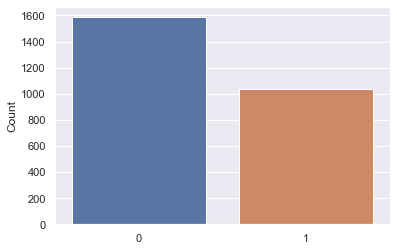

In [67]:
count_target = y_train.value_counts().reset_index()

sns.set_theme(style='darkgrid')

ax = sns.barplot(x= count_target.index, y= 'Potability', data=count_target)
plt.ylabel('Count');

Let's resampling over (we don't have too much data):

In [60]:
ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

We can see that the median and the mean are almost even. There is little variance in the columns:

In [61]:
X_ros.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2695.000000,3172.000000,3172.000000,3172.000000,2423.000000,3172.000000,3172.000000,3025.000000,3172.000000
mean,7.057118,196.546237,22167.074346,7.116390,333.946660,425.628566,14.214545,66.223631,3.973289
std,1.576441,33.310717,8937.571394,1.600603,42.926587,80.756205,3.285029,16.280611,0.783395
min,0.000000,73.492234,728.750830,0.352000,129.000000,181.483754,4.371899,8.175876,1.492207
25%,6.099946,176.025221,15736.815715,6.096091,306.952196,365.128970,12.024866,55.536263,3.439426
50%,6.999765,197.315653,21028.970943,7.124278,333.148318,420.768977,14.150918,66.551419,3.955882
75%,8.006957,217.335603,27370.435698,8.117350,362.108576,480.855683,16.463107,77.241984,4.519866
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


We have seen before that we have missings in 3 columns, of which there are many in Sulfate and ph:

In [62]:
percent_missing = X_ros.isnull().sum() * 100 / len(X_ros)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing,}).sort_values('percent_missing', ascending=False).head()
missing_value_df

,percent_missing
Sulfate,23.612863
ph,15.037831
Trihalomethanes,4.634300
Hardness,0.000000
Solids,0.000000


We have seen that the median and the mean are very close. We are going to replace the NaN by the median but first we are going to find out if there is a difference between the median of the rows of potable and non-potable water:

In [63]:
median_0 = data[data['Potability'] == 0][['Sulfate','ph','Trihalomethanes']].median()
median_1 = data[data['Potability'] == 1][['Sulfate','ph','Trihalomethanes']].median()

median_df = pd.DataFrame({'median Potable': median_1, 'median Non-potable':median_0})
median_df

,median Potable,median Non-potable
Sulfate,331.838167,333.389426
ph,7.036752,7.035456
Trihalomethanes,66.678214,66.542198


We can see that there is hardly a difference. We proceed to replace the NaN with the median:

In [64]:
X_ros = X_ros.fillna(X_ros.median())
X_test = X_test.fillna(X_ros.median())

### Distribution analysis:

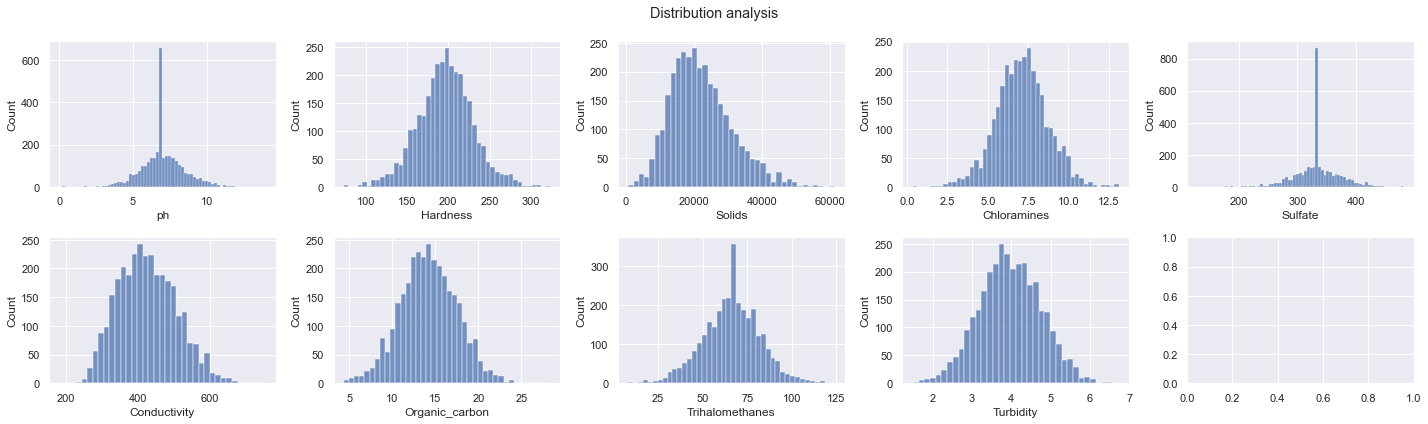

In [65]:
fig, ax = plt.subplots(2,5, figsize=(20,6))

ax1=sns.histplot(data=X_ros, x='ph', ax=ax[0,0])
ax2=sns.histplot(data=X_ros, x='Hardness', ax=ax[0,1])
ax3=sns.histplot(data=X_ros, x='Solids', ax=ax[0,2])
ax4=sns.histplot(data=X_ros, x='Chloramines', ax=ax[0,3])
ax5=sns.histplot(data=X_ros, x='Sulfate', ax=ax[0,4])
ax6=sns.histplot(data=X_ros, x='Conductivity', ax=ax[1,0])
ax7=sns.histplot(data=X_ros, x='Organic_carbon', ax=ax[1,1])
ax8=sns.histplot(data=X_ros, x='Trihalomethanes', ax=ax[1,2])
ax9=sns.histplot(data=X_ros, x='Turbidity', ax=ax[1,3])
 
plt.suptitle('Distribution analysis')    
fig.tight_layout()
plt.show()

The distribution of the features is good except for Solids and Conductivity that pull a little to the right.

### Correlation analysis:

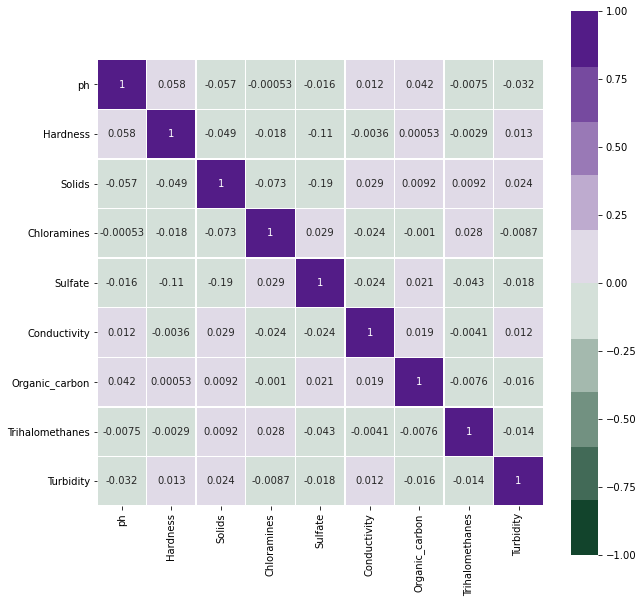

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(X_ros.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

There is no correlation between the variables. In fact, if we look at the data before separating it, there is also no correlation between the variables and the target (Potability).

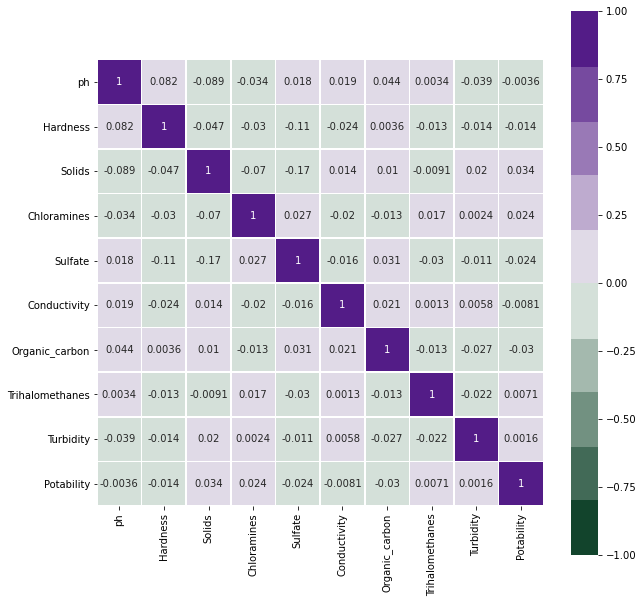

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

What about the outliers?

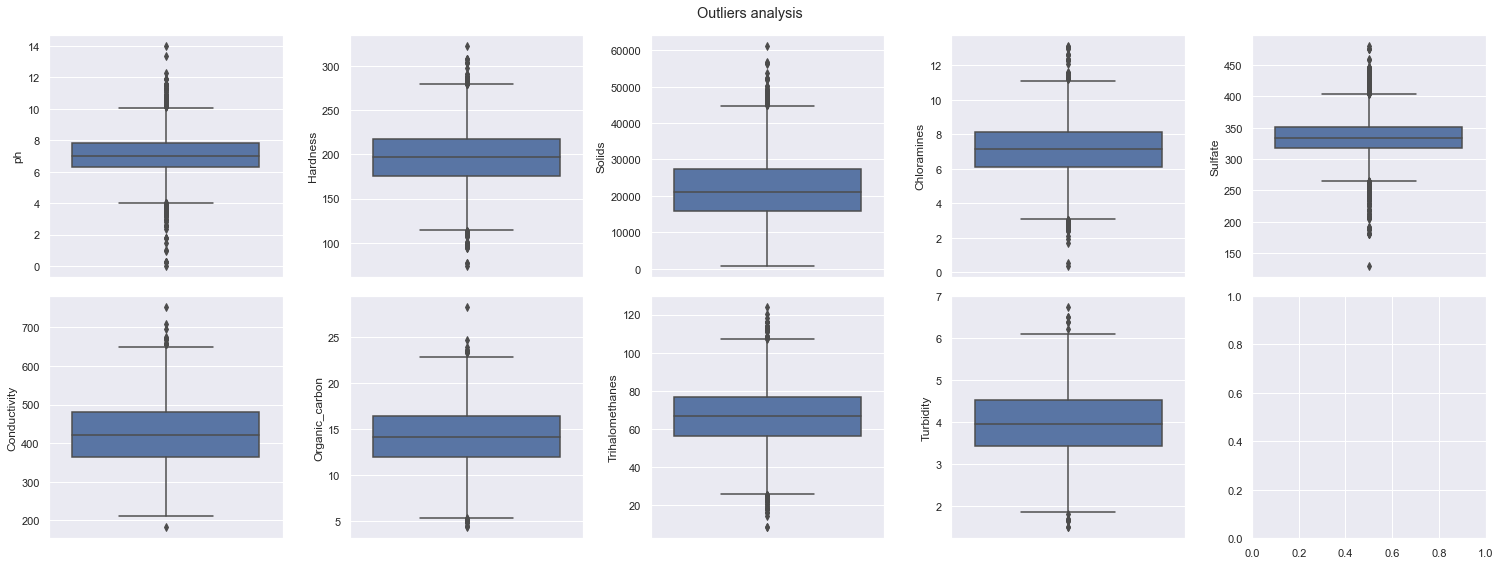

In [66]:
fig, ax = plt.subplots(2,5, figsize=(21,8))

ax1=sns.boxplot(data=X_ros, y='ph', ax=ax[0,0])
ax2=sns.boxplot(data=X_ros, y='Hardness', ax=ax[0,1])
ax3=sns.boxplot(data=X_ros, y='Solids', ax=ax[0,2])
ax4=sns.boxplot(data=X_ros, y='Chloramines', ax=ax[0,3])
ax5=sns.boxplot(data=X_ros, y='Sulfate', ax=ax[0,4])
ax6=sns.boxplot(data=X_ros, y='Conductivity', ax=ax[1,0])
ax7=sns.boxplot(data=X_ros, y='Organic_carbon', ax=ax[1,1])
ax8=sns.boxplot(data=X_ros, y='Trihalomethanes', ax=ax[1,2])
ax9=sns.boxplot(data=X_ros, y='Turbidity', ax=ax[1,3])
 
plt.suptitle('Outliers analysis')    
fig.tight_layout()
plt.show()

We have oultiers for all the variables. Given that the outliers have an impact on the drinkability of the water, we are going to stay with them.

All the features have an importance of a very even weight. We are not going to remove any of them:

In [43]:
X = X_ros
Y = y_ros
names = X_ros.columns
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, Y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.1380,ph
1,0.1293,Hardness
2,0.1220,Sulfate
3,0.1170,Chloramines
4,0.1156,Solids
5,0.1012,Organic_carbon
6,0.0947,Conductivity
7,0.0943,Trihalomethanes
8,0.0879,Turbidity


## MODELING: 

### Supervised Models:

We are going to set up a grid search with a logistic regression, the decision tree, the random forest, the Adaboost, the SVM and the gradient boosting to find out which is the most efficient model. We want to avoid having false positives, so the metric will be the precision one.

In [14]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])

tree_clf = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("DecisionTree", DecisionTreeClassifier()),
])

rand_forest = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("random_forest", RandomForestClassifier()),
])

AdaBoost = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("AB",AdaBoostClassifier(base_estimator=RandomForestClassifier())),
])

svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])

gradientB = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("gradientB",GradientBoostingClassifier())
])

reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}

tree_clf_param = {
    'DecisionTree__criterion':['gini','entropy'],
    'DecisionTree__max_depth': [5,6,8],
    'DecisionTree__min_samples_leaf': [2,3],
    'DecisionTree__max_features': [5,6,7],
    'DecisionTree__random_state':[42]
}

rand_forest_param = {
    "random_forest__n_estimators": [500,750],
    "random_forest__max_depth": [14,15,16],
    "random_forest__min_samples_leaf": [2,3],
    "random_forest__max_features": [5,6,7],
    "random_forest__criterion":['entropy','gini'],
    "random_forest__random_state":[5,10,20,30,42]
}

AdaBoost_param = {
    "AB__base_estimator__max_depth":[5,6,7],
    "AB__base_estimator__min_samples_leaf":[1,2,3],
    "AB__base_estimator__criterion":['entropy','gini'],
    "AB__base_estimator__bootstrap":[True,False],
    "AB__n_estimators":[7,8,9],
    "AB__random_state":[5,10,20,30,42]
}

svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}

gradientB_param = {
    'gradientB__max_depth': [6],
    'gradientB__min_samples_leaf': [3],
    'gradientB__n_estimators': [200],
    'gradientB__learning_rate': [0.4],
    'gradientB__random_state': [5]
}

gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'precision',
                         verbose = 1,
                         n_jobs = -1)

gs_tree_clf = GridSearchCV(tree_clf,
                        tree_clf_param,
                        cv = 10,
                        scoring = 'precision',
                        verbose = 1,
                        n_jobs = -1)


gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'precision',
                         verbose = 1,
                         n_jobs = -1)

gs_Adaboost = GridSearchCV(AdaBoost,
                          AdaBoost_param,
                         cv = 10,
                         scoring = 'precision',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'precision',
                         verbose = 1,
                         n_jobs = -1)

gs_gradientB = GridSearchCV(gradientB,
                         gradientB_param,
                         cv = 10,
                         scoring = 'precision',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_tree_clf": gs_tree_clf,
        "gs_rand_forest": gs_rand_forest,
        "gs_Adaboost": gs_Adaboost,
        "gs_svm": gs_svm,
         "gs_gradientB": gs_gradientB
         }

In [15]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_ros, y_ros)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\lauja\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan 0.50801329        nan 0.50801329        nan 0.50801329
        nan 0.50801329        nan 0.50801329        nan 0.50801329
        nan 0.50801329        nan 0.50801329        nan 0.50801329
        nan 0.50801329        nan 0.50801329        nan 0.50801329
        nan 0.50801329        nan 0.50801329        nan 0.50801329
        nan 0.50801329        nan 0.50801329        nan 0.50801329
        nan 0.50801329        nan 0.50801329]



Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 540 candidates, totalling 5400 fits
Fitting 10 folds for each of 672 candidates, totalling 6720 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [16]:
print(gs_gradientB.best_score_)
print(gs_gradientB.best_params_)
print(gs_gradientB.best_estimator_)

0.7343399131346706
{'gradientB__learning_rate': 0.4, 'gradientB__max_depth': 6, 'gradientB__min_samples_leaf': 3, 'gradientB__n_estimators': 200, 'gradientB__random_state': 5}
Pipeline(steps=[('scaler', StandardScaler()),
                ('gradientB',
                 GradientBoostingClassifier(learning_rate=0.4, max_depth=6,
                                            min_samples_leaf=3,
                                            n_estimators=200,
                                            random_state=5))])


In [17]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best Train score"]).sort_values(by="Best Train score", ascending=False).reset_index()
best_grids

,index,Grid,Best Train score
0,2,gs_rand_forest,0.791816
1,3,gs_Adaboost,0.767847
2,5,gs_gradientB,0.734340
3,4,gs_svm,0.689186
4,1,gs_tree_clf,0.676029
5,0,gs_reg_log,0.508013


In [18]:
best_rand_forest = gs_rand_forest.best_estimator_
best_Adaboost = gs_Adaboost.best_estimator_
best_svm = gs_svm.best_estimator_
best_tree = gs_tree_clf.best_estimator_
best_gradientB = gs_gradientB.best_estimator_
best_reg_log = gs_reg_log.best_estimator_


best_test_score = pd.DataFrame({"Grid": ['rand forest','Adaboost','SVM', 'Tree', 'Gradient boost', 'reg log'],
                                'Best Test score': [best_rand_forest.score(X_test, y_test), best_Adaboost.score(X_test, y_test),best_svm.score(X_test, y_test),best_tree.score(X_test, y_test), best_gradientB.score(X_test, y_test), best_reg_log.score(X_test,y_test)]}).sort_values(by="Best Test score", ascending=False).reset_index()
best_test_score

,index,Grid,Best Test score
0,4,Gradient boost,0.681402
1,0,rand forest,0.670732
2,1,Adaboost,0.661585
3,2,SVM,0.647866
4,3,Tree,0.640244
5,5,reg log,0.516768


### ARTIFICIAL NEURAL NETWORK

Let's set up a neural network to see if we can do better than the supervised models:

In [19]:
scaler = StandardScaler()
scaler.fit(X_ros) 
X_ros = scaler.transform(X_ros) 

X_test = scaler.transform(X_test)

In [20]:
model= keras.Sequential([
    layers.Dense(64, input_shape= (9,), activation= 'relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation= 'relu'),
    layers.Dropout(0.4),
    
    layers.Dense(1, activation= 'sigmoid')
])

In [21]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.Precision(),
)

In [22]:
history = model.fit(
    X_ros,
    y_ros,
    batch_size = 100,
    epochs = 400,
    validation_split = 0.20
)

Epoch 1/400
26/26 [==============================] - 1s 8ms/step - loss: 0.7085 - precision: 0.3870 - val_loss: 0.8844 - val_precision: 1.0000
Epoch 2/400
26/26 [==============================] - 0s 2ms/step - loss: 0.6879 - precision: 0.4504 - val_loss: 0.8693 - val_precision: 1.0000
Epoch 3/400
26/26 [==============================] - 0s 2ms/step - loss: 0.6760 - precision: 0.4533 - val_loss: 0.8546 - val_precision: 1.0000
Epoch 4/400
26/26 [==============================] - 0s 2ms/step - loss: 0.6702 - precision: 0.4961 - val_loss: 0.8557 - val_precision: 1.0000
Epoch 5/400
26/26 [==============================] - 0s 2ms/step - loss: 0.6664 - precision: 0.5000 - val_loss: 0.8270 - val_precision: 1.0000
Epoch 6/400
26/26 [==============================] - 0s 2ms/step - loss: 0.6694 - precision: 0.4932 - val_loss: 0.8395 - val_precision: 1.0000
Epoch 7/400
26/26 [==============================] - 0s 2ms/step - loss: 0.6631 - precision: 0.5326 - val_loss: 0.8296 - val_precision: 1.0000

In [23]:
print("test loss, test precision:", model.evaluate(X_test, y_test))

21/21 [==============================] - 0s 651us/step - loss: 0.5940 - precision: 0.6076
test loss, test precision: [0.5939868092536926, 0.607594907283783]


## RESULTS

We can see that the model with the highest precision in Test has been the Gradient Boosting.

Let's see in more detail how the types of water have been classified with a confusion matrix:

In [45]:
scaler = StandardScaler()
scaler.fit(X_ros) 
X_ros = scaler.transform(X_ros)

X_test = scaler.transform(X_test)

In [46]:
gbct = GradientBoostingClassifier(max_depth=6,
                                  min_samples_leaf=3,
                                 n_estimators=200,
                                  learning_rate =0.4,
                                 random_state=5)

gbct.fit(X_ros, y_ros)


y_pred_gbct = gbct.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred_gbct)

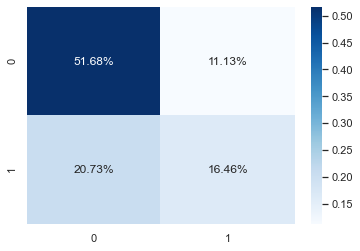

In [48]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

We can see that we have left the false positives at 11% and the false negatives at 20%.
This is what we wanted from the model: better to classify drinking water as non-drinkable than the opposite.

The preprocessing had given us the information that the weight of the different features is very even. Now that we have a model trained and optimized, we will check the permutation importance of all the features. We may improve the model even more by removing the columns with no importance.

Permutation importance in train: 

In [28]:
perm_importance_train = permutation_importance(
    estimator = gbct, 
    X = X_ros, 
    y = y_ros,
    n_repeats=10,
    random_state=42,
    scoring = "r2")

p_imp_train = pd.DataFrame(perm_importance_train.importances_mean,
                  X_train.columns, 
                  columns = ["Permutation importances"]).sort_values("Permutation importances", ascending = False)
p_imp_train

,Permutation importances
Sulfate,0.293064
ph,0.258764
Hardness,0.159395
Solids,0.137957
Chloramines,0.094451
Trihalomethanes,0.088903
Conductivity,0.068474
Organic_carbon,0.051198
Turbidity,0.035813


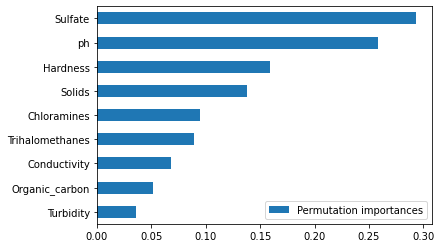

In [29]:
p_imp_train.sort_values("Permutation importances").plot.barh(y= "Permutation importances");

Permutation importance in test: 

In [30]:
perm_importance_test = permutation_importance(
    estimator = gbct, 
    X = X_test, 
    y = y_test,
    n_repeats=10,
    random_state=42,
    scoring = "r2")

p_imp_test = pd.DataFrame(perm_importance_test.importances_mean,
                  X_train.columns, 
                  columns = ["Permutation importances"]).sort_values("Permutation importances", ascending = False)
p_imp_test

,Permutation importances
ph,0.369998
Sulfate,0.364778
Hardness,0.208817
Solids,0.181410
Conductivity,0.152045
Chloramines,0.150088
Trihalomethanes,0.116155
Turbidity,0.090705
Organic_carbon,0.085485


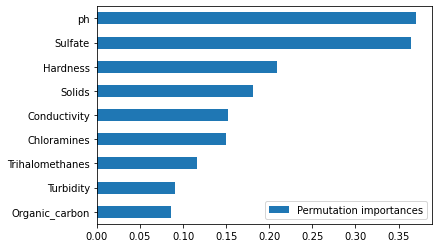

In [31]:
p_imp_test.sort_values("Permutation importances").plot.barh(y= "Permutation importances");

In both Train and Test, we can see that all the features have some importance, so we are not going to remove any column.

Also, we can note that there are 2 variables that have a way bigger weight than the others: Ph and Sulfate.